# ISLR Chapter 4 - Classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Exercise 6


In [2]:
p=np.exp(-6+0.05*40+3.5)/(1+np.exp(-6+0.05*40+3.5))
print(p)


0.37754066879814546


In [3]:
p = 0.5

print("(np.exp(-6+0.05*X+3.5)/(1+np.exp(-6+0.05*X+3.5)))/p")
print("X = 50 hours")

(np.exp(-6+0.05*X+3.5)/(1+np.exp(-6+0.05*X+3.5)))/p
X = 50 hours


## Exercise 9


In [4]:
print("P(x)/(1-P(x)) = 0.37")
print("P(x) = 27%")

P(x)/(1-P(x)) = 0.37
P(x) = 27%


In [5]:
print("P(x)/(1-P(x)) = odds")
print("0.16/(1-0.16)  =  0.19")

P(x)/(1-P(x)) = odds
0.16/(1-0.16)  =  0.19


## Exercise 12



## Exercise 13

მეორე გამოცემის [Resources](https://www.statlearning.com/resources-second-edition)-ში [All .csv files, as .zip](https://www.statlearning.com/s/ALL-CSV-FILES-2nd-Edition-corrected.zip)-ში არის `Weekly.csv`


In [6]:
data =  pd.read_csv("Weekly.csv")
data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


### a


In [7]:
correlations = data.corr(method='pearson')
print(correlations)

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000  


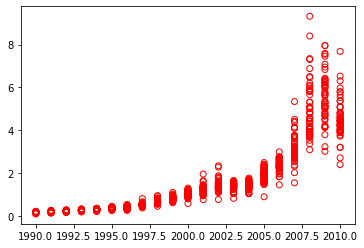

In [8]:
plt.scatter(data.Year.values,data.Volume.values, facecolors='none', edgecolors='r');

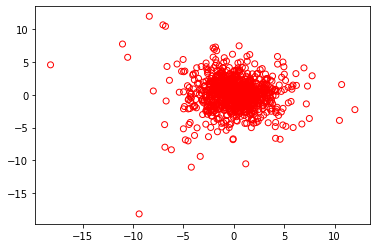

In [9]:
plt.scatter(data.Lag1.values, data.Today.values, facecolors='none', edgecolors='r' );

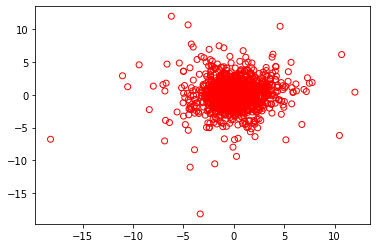

In [10]:
plt.scatter(data.Lag2.values, data.Today.values, facecolors='none', edgecolors='r' );


### b



In [11]:
predictors = data.columns[1:7]
X = data[predictors]
y = pd.Series([1 if el=='Up' else 0 for el in data.Direction.values],index=X.index)

In [12]:
#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=4)

In [13]:
log_reg = LogisticRegression(random_state = 2)
results = log_reg.fit(X, y)
# y_pred = log_reg.predict(X_test)
# y_pred
summary = data.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000



### c



In [14]:
y_predicted = results.predict(X)
y_predicted= np.array(y_predicted > 0.5, dtype=float)

table = np.histogram2d(y_predicted, y, bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

       Down     Up
Down   54.0   48.0
Up    430.0  557.0


Error Rate = 0.43893480257116624


In [15]:
y_predicted

array([1., 1., 1., ..., 1., 1., 1.])


### d



In [16]:
X_train = data[data.Year <= 2008][["Lag2"]]
response_train = data[data.Year <= 2008][["Direction"]]
response_train = response_train.to_numpy()
y_train = np.array([1 if el=='Up' else 0 for el in response_train])


X_test = data[data.Year > 2008][["Lag2"]]
response_test = data[data.Year > 2008][["Direction"]]
response_test = response_test.to_numpy()
y_test = np.array([1 if el=='Up' else 0 for el in response_test])


In [17]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [18]:
log_reg = LogisticRegression(random_state = 2)
results = log_reg.fit(X_train, y_train)

In [19]:
y_predicted = results.predict(X_test)
#conver the predicted probabilities to a class
y_predicted= np.array(y_predicted > 0.5, dtype=float)

In [20]:
y_predicted

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [21]:
table = np.histogram2d(y_predicted, y_test, bins=2)[0]
print('CONFUSION MATRIX')
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('\n')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

CONFUSION MATRIX
      Down    Up
Down   9.0   5.0
Up    34.0  56.0


Error Rate = 0.375



### e




### f




### g


In [22]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down    Up
Down  21.0  30.0
Up    22.0  31.0

Error Rate = 0.5



### h

დაიხმარეთ **Python Data Science Handbook**-ის [In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)


In [23]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)


table = np.histogram2d(y_predicted, y_test , bins=2)[0]
print(pd.DataFrame(table, ['Down', 'Up'], ['Down', 'Up']))
print('')
print('Error Rate =', 1-(table[0,0]+table[1,1])/np.sum(table))

      Down    Up
Down   0.0   0.0
Up    43.0  61.0

Error Rate = 0.41346153846153844



### i





### j




## Exercise 14


### Loading Data

* [Auto.data](https://www.statlearning.com/s/Auto.data)

* [Auto.csv](https://www.statlearning.com/s/Auto.csv)

In [24]:
df = pd.read_csv('Auto.csv',na_values='?')
df = df.dropna()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


### a


In [25]:
df['MPG01'] = df.mpg > df.mpg.median()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,MPG01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,False
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,False
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,False
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,False
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,False



### b



<AxesSubplot:>

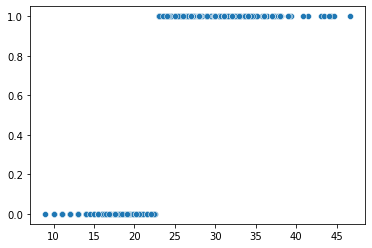

In [26]:
sns.scatterplot(data = df,x=df["mpg"].values, y=df['MPG01'].values)

<AxesSubplot:>

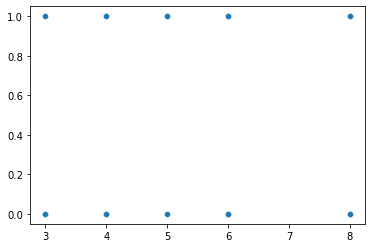

In [27]:
sns.scatterplot(data = df,x=df["cylinders"].values, y=df['MPG01'].values)

<AxesSubplot:>

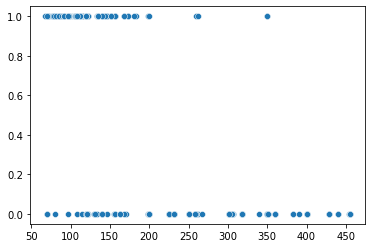

In [28]:
sns.scatterplot(data = df,x=df["displacement"].values, y=df['MPG01'].values)

<AxesSubplot:>

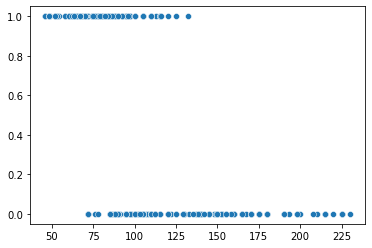

In [29]:
sns.scatterplot(data = df,x=df["horsepower"].values, y=df['MPG01'].values)

<AxesSubplot:>

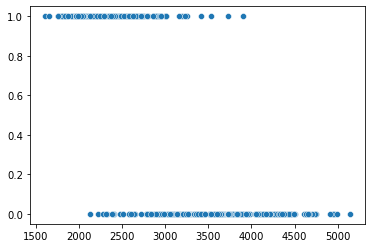

In [30]:
sns.scatterplot(data = df,x=df["weight"].values, y=df['MPG01'].values)

<AxesSubplot:>

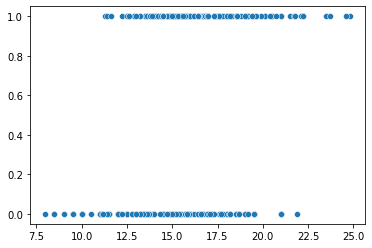

In [31]:
sns.scatterplot(data = df,x=df["acceleration"].values, y=df['MPG01'].values)

<AxesSubplot:>

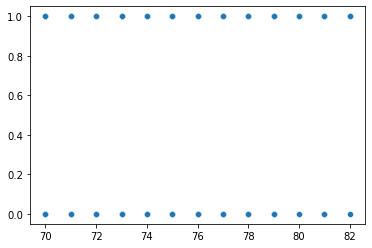

In [32]:
sns.scatterplot(data = df,x=df["year"].values, y=df['MPG01'].values)

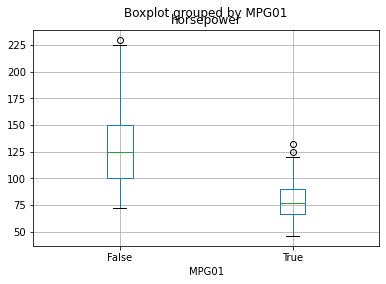

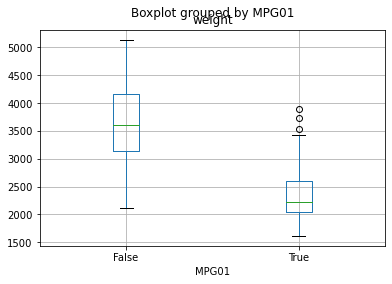

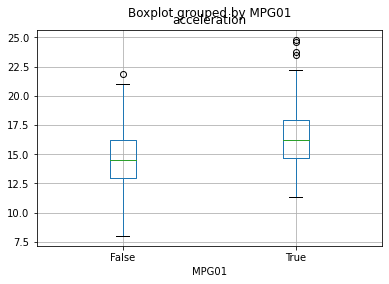

In [33]:

df.boxplot(['horsepower'], by='MPG01');
df.boxplot(['weight'],by='MPG01');
df.boxplot(['acceleration'], by='MPG01');



### c



In [34]:
num_samples = 300
rows = np.random.choice([True, False], num_samples)

In [35]:
train_test_ratio = 0.75

In [36]:
np.random.seed(42)
train_array = np.random.choice([True, False],
                               size=df.shape[0],
                               p=[train_test_ratio, 1-train_test_ratio])
#train_array

In [37]:
df_train = np.arange(df.shape[0])[train_array == True]
df_test = np.arange(df.shape[0])[train_array == False]
df_train, df_test

(array([  0,   2,   3,   4,   5,   6,   8,   9,  10,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,
         31,  32,  36,  37,  38,  39,  40,  41,  42,  44,  45,  46,  47,
         48,  49,  54,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,
         68,  71,  72,  74,  75,  77,  78,  79,  81,  82,  83,  84,  85,
         86,  87,  89,  90,  91,  93,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 105, 106, 108, 109, 110, 111, 114, 117, 119, 122, 123,
        124, 125, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 155, 156,
        158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 179, 180, 181, 184, 185, 187, 188,
        189, 190, 193, 194, 195, 196, 200, 201, 202, 204, 205, 206, 207,
        208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221,
        222, 223, 224, 225, 227, 229, 231, 232, 233

In [43]:
df_train = df.loc[df_train,:]
df_test = df.loc[df_test,:]
df_train, df_test

ValueError: Cannot index with multidimensional key


### d



In [ ]:
predictors = ['horsepower', 'weight', 'acceleration']
X_train =  df_train[predictors].values
y_train = df_train['MPG01'].values

X_test = df_test[predictors].values
y_test = df_test['MPG01'].values


### e




### f




### g

 დაიხმარეთ **Python Data Science Handbook**-ის [In Depth: Naive Bayes Classification](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html)


### h




## Exercise 16


In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

col_names = np.append(boston.feature_names, 'MEDV')

df = pd.DataFrame(boston_data, columns = col_names)
df.head()

In [ ]:
df['CRIM01'] = pd.Series(df.CRIM > df.CRIM.median(), index=df.index)
df.head()

### Logistic Regression

### LDA

### Naive Bayes

### KNN